<a href="https://colab.research.google.com/github/miramnair/License-plate-detection-with-YOLOv7-and-PaddleOCR/blob/main/License_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from google.colab.patches import cv2_imshow

In [3]:
!pip install -r drive/MyDrive/yolov7/requirements.txt
!pip install -r drive/MyDrive/yolov7/requirements_gpu.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu113


In [7]:
%cd drive/MyDrive/yolov7

/content/drive/MyDrive/yolov7


## **Train the model**

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

2023-10-23 08:53:37.049905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 08:53:38.054485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16150.875MB)

Namespace(weights='yolov7.pt', cfg='', data='data/coco.yaml', hyp='data/hyp.scratch.custom.yaml', epochs=100, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=1, project='runs/train', entity=None, name='yolov7-custom', exist_ok=False, quad=Fa

# **Display Figures**

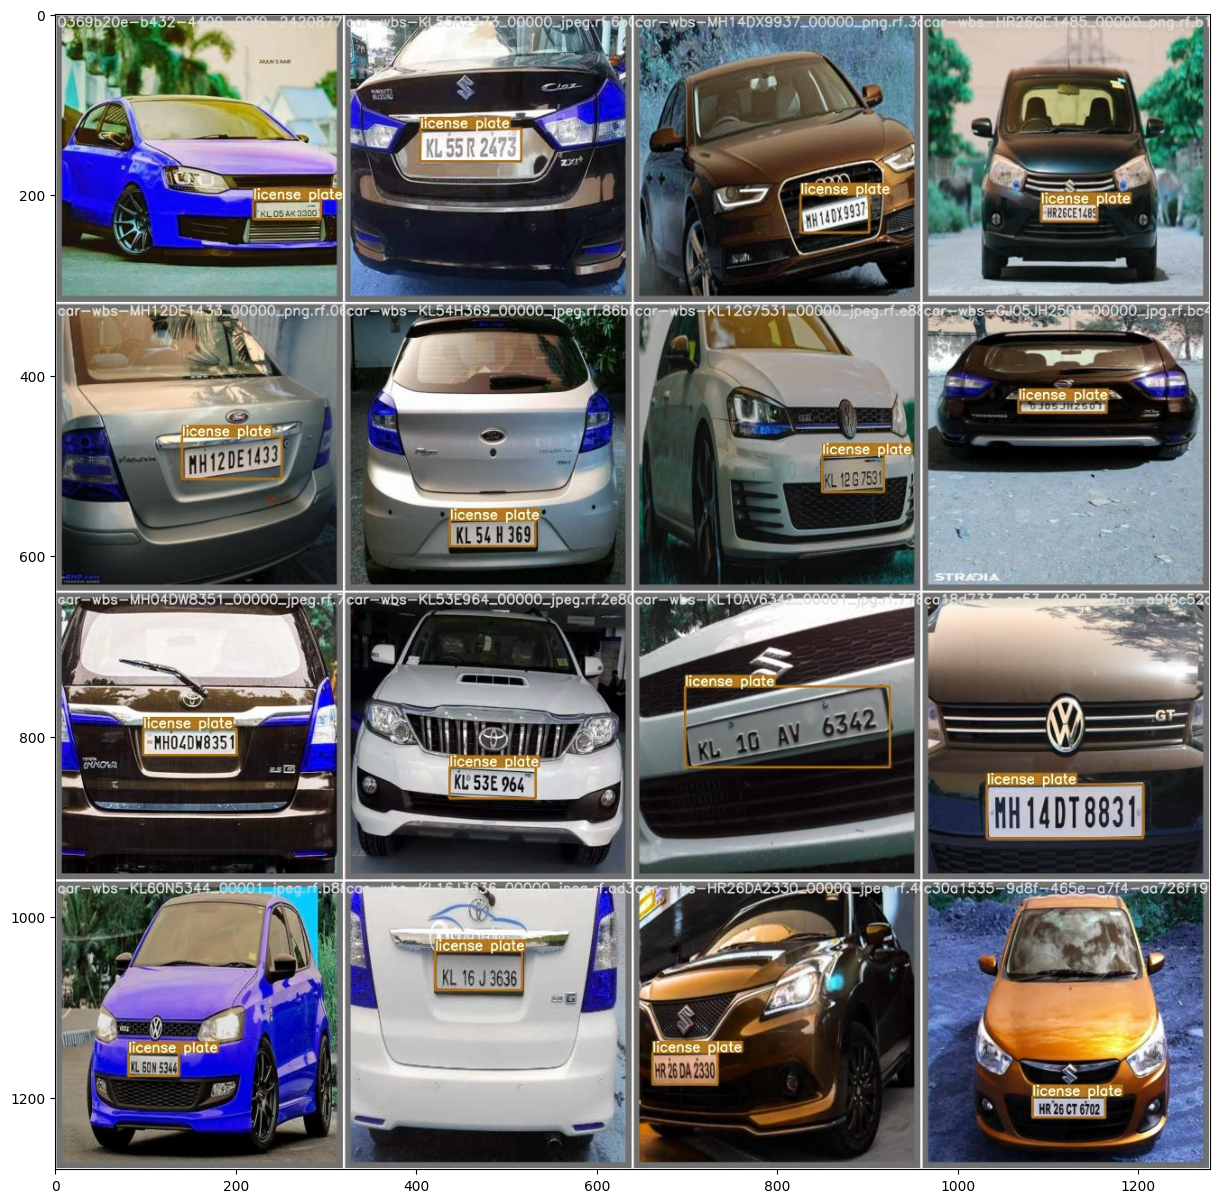

In [7]:
# Check the performance of validation batch

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("runs/train/yolov7-custom3/test_batch0_labels.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

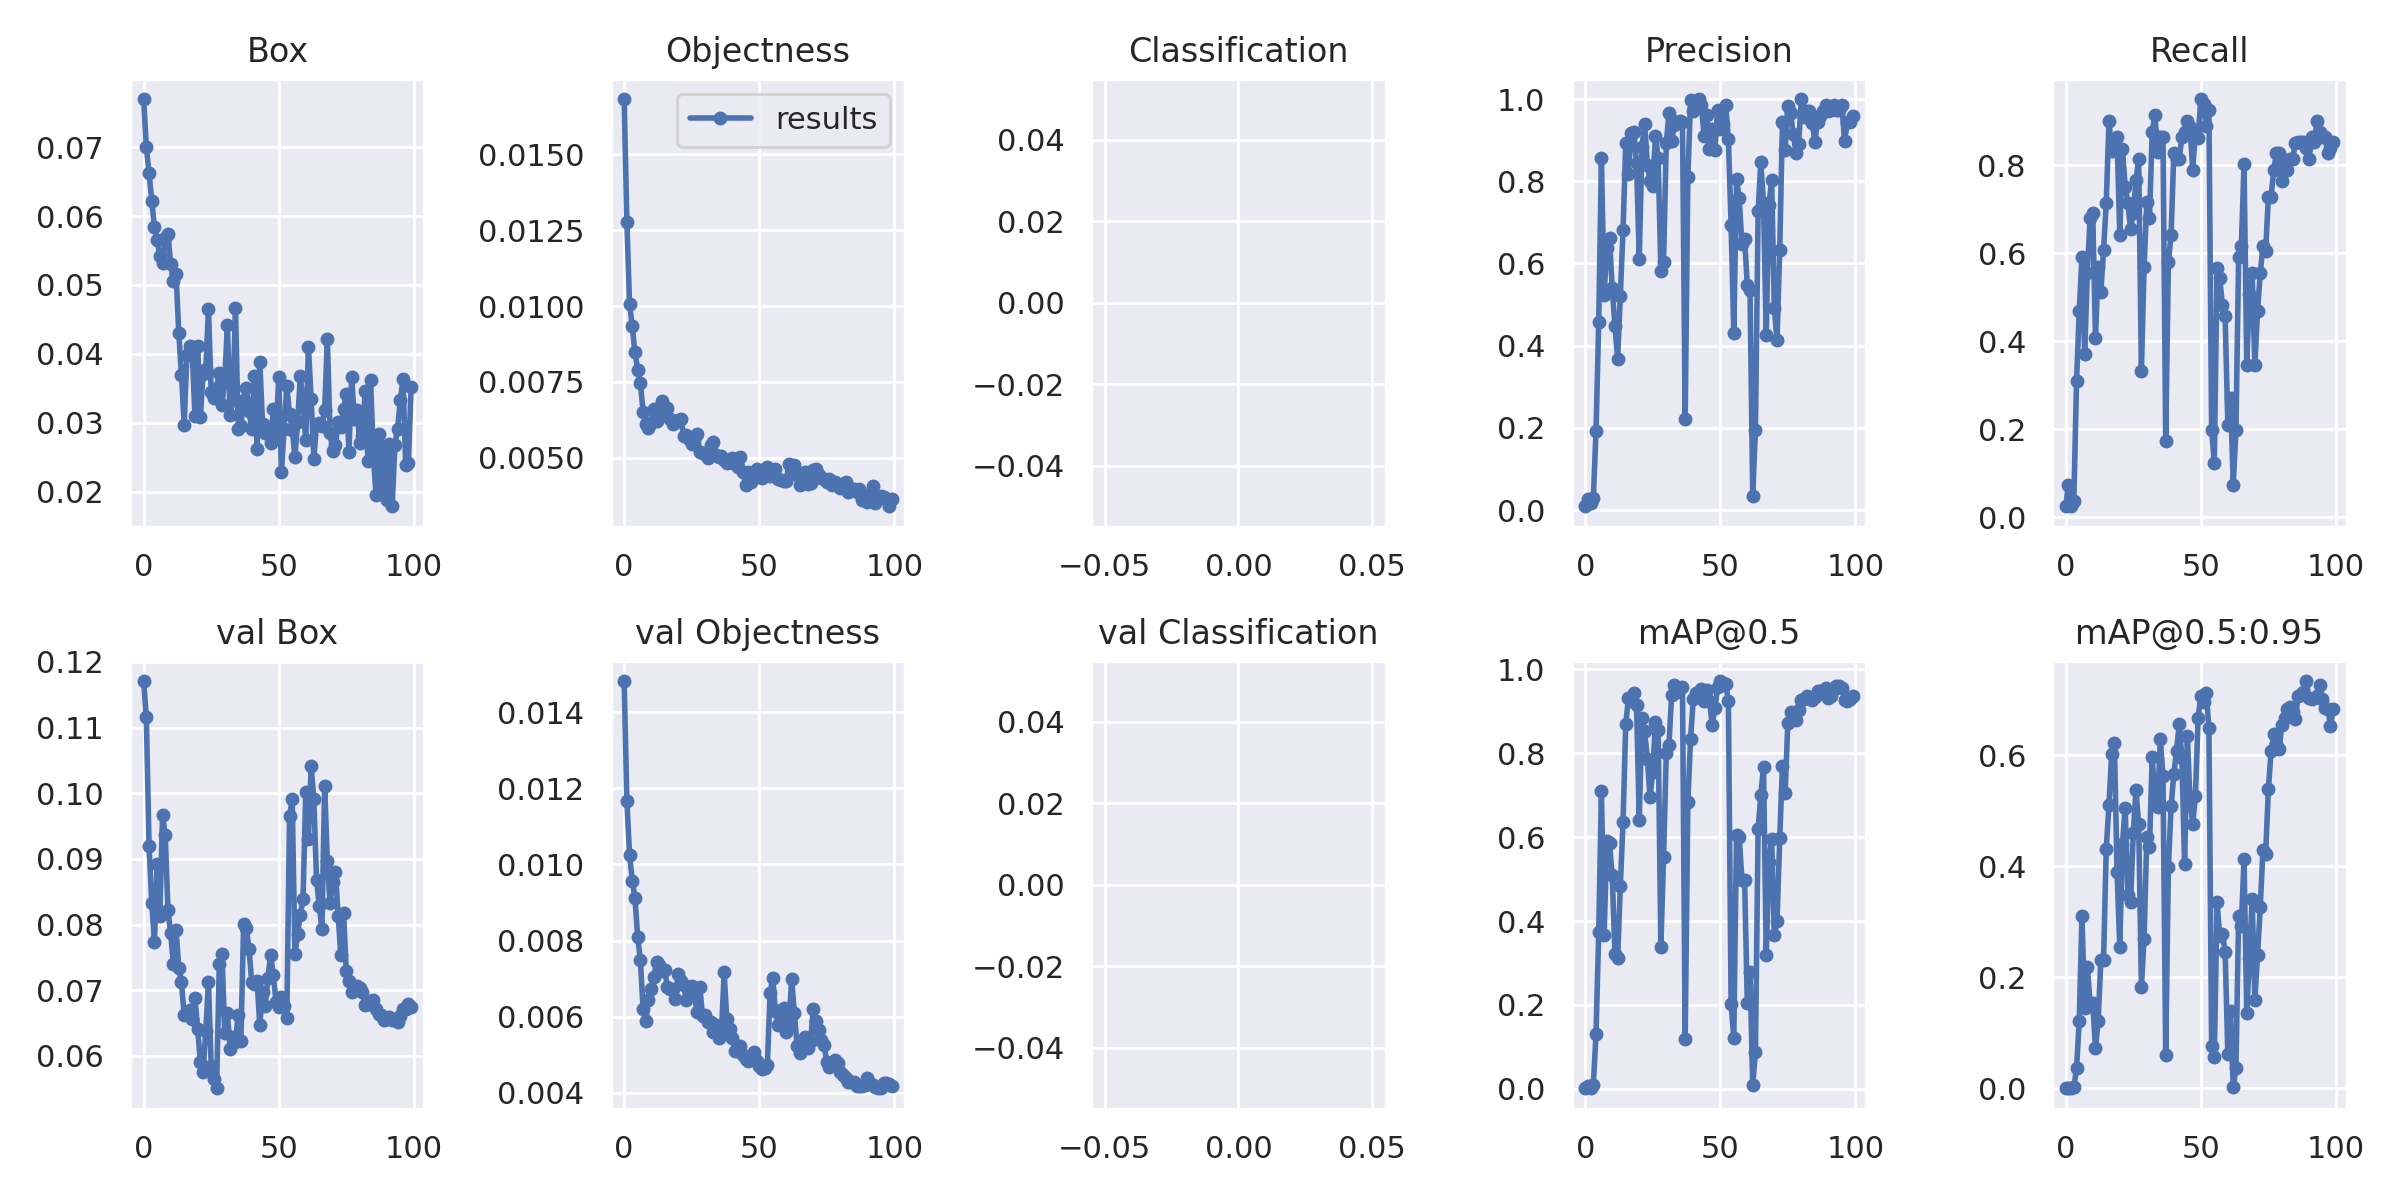

<Figure size 1500x1500 with 0 Axes>

In [13]:
#print graphs
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("runs/train/yolov7-custom3/results.png")
#plt.figure(figsize=(15, 15))
#plt.imshow(img)
cv2_imshow(img)

# **Test Case 1 : Test a UK License plate**

In [9]:
results = !python detect.py --weights runs/train/yolov7-custom3/weights/best.pt --conf 0.5 --img-size 640 --source UK_LP.jpeg --no-trace --save-txt

In [10]:
results

["Namespace(weights=['runs/train/yolov7-custom3/weights/best.pt'], source='UK_LP.jpeg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)",
 'YOLOR 🚀 v0.1-126-g84932d7 torch 2.1.0+cu118 CPU',
 '',
 'Fusing layers... ',
 'RepConv.fuse_repvgg_block',
 'RepConv.fuse_repvgg_block',
 'RepConv.fuse_repvgg_block',
 '/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)',
 '  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]',
 'Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS',
 '1 license plate, Done. (1453.7ms) Inference, (24.4ms) NMS',
 ' The image with the resul

## **Extract the bounding box from test image**

In [11]:
def get_bounding_box_coordinates(image_width, image_height, x_center, y_center, width, height):
    # Calculate the coordinates of the bounding box
    x_center_pixel = x_center * image_width
    y_center_pixel = y_center * image_height
    half_width = width * image_width / 2
    half_height = height * image_height / 2

    # Calculate the coordinates of the bounding box
    xmin = int(x_center_pixel - half_width)
    ymin = int(y_center_pixel - half_height)
    xmax = int(x_center_pixel + half_width)
    ymax = int(y_center_pixel + half_height)

    return xmin, ymin, xmax, ymax


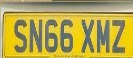

In [15]:
import cv2
# Load the predicted test image
image_path = '/content/drive/MyDrive/yolov7/runs/detect/exp/UK_LP.jpeg'
image = cv2.imread(image_path)

# Specify the path to the text file prediction ([label, x_center, y_center, width, height])
txt_file_path = '/content/drive/MyDrive/yolov7/runs/detect/exp/labels/UK_LP.txt'

with open(txt_file_path, 'r') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    # Split the line into its components
    parts = line.split()
    if len(parts) == 5:
        class_id, center_x, center_y, width, height = map(float, parts)
        #yolov7 was trained with image size of 640x640
        img_width = 640
        img_height = 640
        xmin, ymin, xmax, ymax = get_bounding_box_coordinates(img_width, img_height,center_x, center_y, width, height) #function call
        # Crop the image to extract the bounding box region
        image = cv2.resize(image, (640, 640))
        cropped_region = image[ymin:ymax, xmin:xmax]

        # Display the cropped region
        cv2_imshow(cropped_region)
        cv2.waitKey(0)  # Wait for a key press (in milliseconds) to close the window

cv2.destroyAllWindows()


### ***Read the License plate***

**Install Paddleocr**

In [16]:
!pip install paddlepaddle
!pip install paddleocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Import PaddleOCR and read the license plate**

In [23]:
import numpy as np
from paddleocr import PaddleOCR

# Convert PIL image to NumPy array
image_np = np.array(cropped_region)

# Initialize PaddleOCR
ocr = PaddleOCR()

# Perform OCR on the NumPy array
result = ocr.ocr(image_np)

# Extract the detected text
license_plate_text = '\n'.join([' '.join(str(item) for item in line) for _, line in result[0]])

# Print the extracted text
print("License plate Number :", license_plate_text.split()[0])

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:16<00:00, 288kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:11<00:00, 956kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 139kiB/s]

[2023/10/30 11:27:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

[2023/10/30 11:27:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2023/10/30 11:27:18] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07562875747680664
[2023/10/30 11:27:18] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2643003463745117
License plate Number : SN66XMZ


# **Test Case 2 : Video**

In [34]:
results = !python detect.py --weights runs/train/yolov7-custom3/weights/best.pt --conf 0.5 --img-size 640 --source demo.mp4 --no-trace --save-txt
results

["Namespace(weights=['runs/train/yolov7-custom3/weights/best.pt'], source='demo.mp4', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)",
 'YOLOR 🚀 v0.1-126-g84932d7 torch 2.1.0+cu118 CPU',
 '',
 'Fusing layers... ',
 'RepConv.fuse_repvgg_block',
 'RepConv.fuse_repvgg_block',
 'RepConv.fuse_repvgg_block',
 '/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)',
 '  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]',
 'Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS',
 'video 1/1 (1/631) /content/drive/MyDrive/yolov7/demo.mp4: 1 license plate, Done. (2557.6m